In [ ]:
# ===============================
# Shallow Neural Network from Scratch
# Dataset: Iris (Multiclass Classification)
# ===============================

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# =======================================
# 1. Load and Preprocess Data
# =======================================
iris = datasets.load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# Normalize features for better convergence
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set: X={X_train.shape}, y={y_train.shape}")
print(f"Test set:     X={X_test.shape}, y={y_test.shape}")


# =======================================
# 2. Helper Functions
# =======================================
def initialize_parameters(input_dim: int, hidden_dim: int, output_dim: int):
    np.random.seed(42)
    W1 = np.random.randn(hidden_dim, input_dim) * np.sqrt(1. / input_dim)
    b1 = np.zeros((hidden_dim, 1))
    W2 = np.random.randn(output_dim, hidden_dim) * np.sqrt(1. / hidden_dim)
    b2 = np.zeros((output_dim, 1))
    return W1, b1, W2, b2

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def softmax(Z):
    Z_shift = Z - np.max(Z, axis=0, keepdims=True)
    expZ = np.exp(Z_shift)
    return expZ / np.sum(expZ, axis=0, keepdims=True)


# =======================================
# 3. Forward & Backward Propagation
# =======================================
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X.T) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    cache = (Z1, A1, Z2, A2)
    return A2, cache

def compute_loss(Y, A2):
    m = Y.shape[0]
    eps = 1e-9
    log_probs = -np.log(A2[Y.T == 1] + eps)
    return np.sum(log_probs) / m

def backward_propagation(X, Y, cache, W2):
    m = X.shape[0]
    Z1, A1, Z2, A2 = cache

    dZ2 = A2 - Y.T
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * A1 * (1 - A1)
    dW1 = (1 / m) * np.dot(dZ1, X)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    return W1, b1, W2, b2


# =======================================
# 4. Training Loop
# =======================================
def train_neural_network(X, Y, hidden_dim=10, lr=0.01, epochs=5000, print_every=500):
    input_dim = X.shape[1]
    output_dim = Y.shape[1]
    W1, b1, W2, b2 = initialize_parameters(input_dim, hidden_dim, output_dim)

    for i in range(epochs + 1):
        A2, cache = forward_propagation(X, W1, b1, W2, b2)
        loss = compute_loss(Y, A2)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, cache, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)

        if i % print_every == 0:
            print(f"Epoch {i:5d} | Loss: {loss:.4f}")

    return W1, b1, W2, b2


# =======================================
# 5. Prediction & Evaluation
# =======================================
def predict(X, W1, b1, W2, b2):
    A2, _ = forward_propagation(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=0)

def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100


# =======================================
# 6. Run Training and Evaluate
# =======================================
W1, b1, W2, b2 = train_neural_network(X_train, y_train, hidden_dim=10, lr=0.05, epochs=5000)

y_pred = predict(X_test, W1, b1, W2, b2)
y_true = np.argmax(y_test, axis=1)
acc = accuracy_score(y_true, y_pred)

print(f"\nTest Set Accuracy: {acc:.2f}%")

Training set: X=(120, 4), y=(120, 3)
Test set:     X=(30, 4), y=(30, 3)
Epoch     0 | Loss: 1.2441
Epoch   500 | Loss: 0.3248
Epoch  1000 | Loss: 0.2246
Epoch  1500 | Loss: 0.1663
Epoch  2000 | Loss: 0.1305
Epoch  2500 | Loss: 0.1088
Epoch  3000 | Loss: 0.0948
Epoch  3500 | Loss: 0.0853
Epoch  4000 | Loss: 0.0784
Epoch  4500 | Loss: 0.0732
Epoch  5000 | Loss: 0.0691

Test Set Accuracy: 96.67%


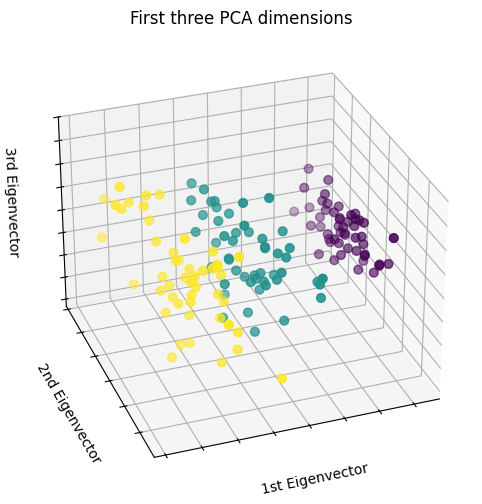

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()